## Robbins-Monroe Algorithm

Assume we wish to find the root of an unknown function $g(x)$. If $g(x)$ were known and continuously differentiable we could apply Newton's method

$$x_{n+1} = x_n - \frac{g(x_n)}{g_x(x_n)}$$

where $g_x(\cdot)$ is the derivative of $g(\cdot)$ with respect to $x$. An alternative approach would be to use the following iterative updates

$$x_{n+1} = x_n + \epsilon g(x_n)$$

where we no longer need the derivative of $g(x)$ and convergence is guaranteed if $x_0-x^*$ is sufficiently small, where $x^*$ is a root $g(x^*)=0$.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interactive
import numpy as np

np.random.seed(12)


def f(x):
    return np.sin(x)

true_root = np.pi
approx_root = np.pi/2 -1
x_vals = np.linspace(-np.pi/4, 2*np.pi+np.pi/4, 200)
f_vals = f(x_vals)

def draw(i=0):
    global approx_root

    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(x_vals, f_vals, c='r', lw=3, label='$f(x)$')
    ax.scatter([approx_root],[0],lw=3,c='k')
    ax.plot([approx_root,approx_root],[0,1],label="$\tilde{x}$", lw=3)
    ax.plot([-np.pi/4,2*np.pi+np.pi/4],[0,0],c='grey')
    ax.set_xlim(-np.pi/4,2*np.pi+np.pi/4)
    plt.show()
    approx_root += 0.5*(f(approx_root)+np.random.normal(0,0.1))
    

interactive_plot = interactive(draw, i=(0, 9999))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(IntSlider(value=0, description='i', max=9999), Output(layout=Layout(height='500px'))), _…

More insight as to why the above scheme works is to look at the recursive formulation of the linear least squares estimator of the mean.

$$\mu^* = \min_{\mu} \frac{1}{2}\sum_n^N (x_n-\mu)^2 = \sum_n^N \frac{x_n}{N}$$

If we rewrite the far RHS recursively we arrive at an expression similar to our above iterative scheme

$$\mu_{n+1} = \mu_n + \epsilon_n (x_n-\mu_n)$$

where $\epsilon_n = \frac{1}{1+n}$ and shows how the step size decreases naturally and leads to an implicit averaging of the observations.

### Example

Let $F(x,\theta)$ be an unknown distribution function of a real-valued random variable $x$. Let's define $f(\theta) = \int x F(\text{dx},\theta)$, to be the mean value under a particular $\theta$. The goal is to find a value $\theta^*$ such that $f(\theta^*)=0$.

### On Convergence

We explore convergence theorems because as stated by Kushner and Yin (pg 216)
"Convergence theorems are a guide to behavior."

According to Kushner and Yin (pg 215) convergence with probability one can be misleading...
"In the context of the actual way in which stochastic approximation algorithms
are used in applications, an assertion of probability one convergence can be
misleading. For example, there is usually some sort of stopping rule that
tells us when to stop the iteration and to accept as the final value either
the most recent iterate or some function of the iterates that were taken
“shortly” before stopping. The stopping rule might simply be a limit on
the number of iterations allowed, or it might be a more sophisticated rule
based on an estimate of the improvement of the mean performance over
the recent past, or perhaps on the “randomness” of the behavior of the
recent iterations (the more “random,” the more likely that the iterate is
in a neighborhood of a stationary point)."

Indeed, even more convergence with probability one may not even be what we desire for online algorithms as pointed out by Kushner and Yin (pg 215)

"If the application of stochastic approximation is done via a simulation,
then one can control the model so that it does not change over time (but
even then there is a stopping rule). Nevertheless, the situation is different
when the stochastic approximation is used to optimize a system on-line,
since convergence with probability one implies that we can iterate essen-
tially forever, and the system will remain unchanged however long the
procedure is. In practical on-line applications, the step size n is often not
allowed to decrease to zero, due to considerations concerning robustness
and to allow some tracking of the desired parameter as the system changes
slowly over time. Then probability one convergence does not apply."

In [3]:
import numpy as np
def f(x):
    return np.log(x)/(1-x) + 1

In [57]:
def rm(f,x0):
    x = x0
    for itr in range(int(1e6)):
        step = 1/(1+itr)
        #step = 1
        eps = np.random.normal(scale=step)
        x = x - step*f(x)
        if np.abs(f(x)) < 1e-3:
            return (x, itr)
    return (x, itr)

In [60]:
rm(f,2.7)

(1.003487691138619, 999999)

In [15]:
import matplotlib.pyplot as plt

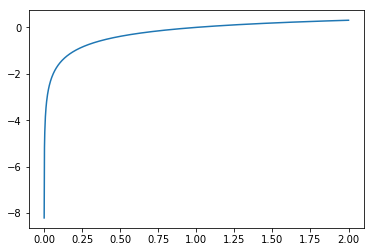

In [16]:
rng = np.linspace(0.0001,2,1000)
plt.plot(rng, f(rng))
plt.show()

It is important to note that the sign involved in the stochastic update equation

$$ x_{n+1} = x_n \pm \epsilon_n g(x_n) $$

will determine whether the algorithm is moving towards a stable equilibrium (for the $+$ sign) or an unstable equilibrium (the $-$ sign).